In [1]:
# Import Statements

# Math
from math import cos, sin, pi, radians
import numpy as np
import pandas as pd

# Graphing and Display
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

![](wikirotationmatrices.png)

In [2]:
# Coordinate System Transform Array

# Translation Element
transl = [0, 0, 0]

# Rotation Element

# CCW rotation about the x-axis
rot_row1 = [.866, 0, -.5]
rot_row2 = [0, 1, 0] 
rot_row3 = [.5, 0, .866]

# Rotation about the X-axis
theta = radians(90)
rot_row1 = [1, 0, 0]
rot_row2 = [0, cos(theta), -sin(theta)] 
rot_row3 = [0, sin(theta), cos(theta)]

# Transform Operator as a DataFrame
transform = np.array([np.append(rot_row1, transl[0]),
                      np.append(rot_row2, transl[1]),
                      np.append(rot_row3, transl[2]), [0, 0, 0, 1]])

display(HTML('<header><h3>Coordinate System Transform Array</h3></header>' + pd.DataFrame(transform).rename(columns = {0:'Col 1', 1:'Col 2', 2:'Col 3', 3:'Col 4'}).to_html()))

,Col 1,Col 2,Col 3,Col 4
0,1.0,0.000000e+00,0.000000e+00,0.0
1,0.0,6.123234e-17,-1.000000e+00,0.0
2,0.0,1.000000e+00,6.123234e-17,0.0
3,0.0,0.000000e+00,0.000000e+00,1.0


In [3]:
r_circ1 = 25
r_circ1_height = 0
circ1_x = []
circ1_y = []
circ1_z = []
circ1_view = []

r_circ2 = 8
circ2_x = []
circ2_y = []
circ2_z = []
circ2_view = []
circ2 = []

#coord_sys_new_org = np.array([10,20,30,1])

#Points before Transform:
for pt in np.linspace(0, 2*pi):
    circ1_x.append(r_circ1 * cos(pt))
    circ1_y.append(r_circ1 * sin(pt))
    circ1_z.append(r_circ1_height)
    circ1_view.append(1)

In [4]:
# Original Data -> Dataframe

x = circ1_x
y = circ1_y
z = circ1_z
view = circ1_view
data_pts_in_A = pd.DataFrame({'x':x, 'y':y, 'z':z, 'view':view}) # If I try to use a np array, it thinks I am trying to multiply a 4,3 array by a 4,# data pts array

display(HTML(data_pts_in_A.to_html()))
data_pts_in_A.to_excel('data_pts_in_A.xlsx')

,x,y,z,view
0,25.000000,0.000000e+00,0,1
1,24.794750,3.196929e+00,0,1
2,24.182372,6.341365e+00,0,1
3,23.172919,9.381675e+00,0,1
4,21.782968,1.226794e+01,0,1
5,20.035341,1.495276e+01,0,1
6,17.958734,1.739206e+01,0,1
7,15.587245,1.954579e+01,0,1
8,12.959814,2.137857e+01,0,1
9,10.119584,2.286032e+01,0,1


In [5]:
# Transformed Data

#not working?
#data_pts_in_B = pd.DataFrame(data_pts_in_A.dot(transform))
#data_pts_in_B = data_pts_in_B.rename(columns = {0:'x', 1:'y', 2:'z', 3:'view'})

data_pts_in_B = data_pts_in_A.apply(lambda point: transform@point, axis = 1)

data = []
for row in data_pts_in_B:
    data.append([row[0], row[1], row[2], row[3]])

data_pts_in_B = pd.DataFrame(data, columns = ['x', 'y', 'z', 'view'])

display(HTML(data_pts_in_B.to_html()))
data_pts_in_B.to_excel('data_pts_in_B.xlsx')

,x,y,z,view
0,25.000000,0.000000e+00,0.000000e+00,1.0
1,24.794750,1.957554e-16,3.196929e+00,1.0
2,24.182372,3.882966e-16,6.341365e+00,1.0
3,23.172919,5.744619e-16,9.381675e+00,1.0
4,21.782968,7.511946e-16,1.226794e+01,1.0
5,20.035341,9.155927e-16,1.495276e+01,1.0
6,17.958734,1.064957e-15,1.739206e+01,1.0
7,15.587245,1.196834e-15,1.954579e+01,1.0
8,12.959814,1.309060e-15,2.137857e+01,1.0
9,10.119584,1.399791e-15,2.286032e+01,1.0


<IPython.core.display.Javascript object>


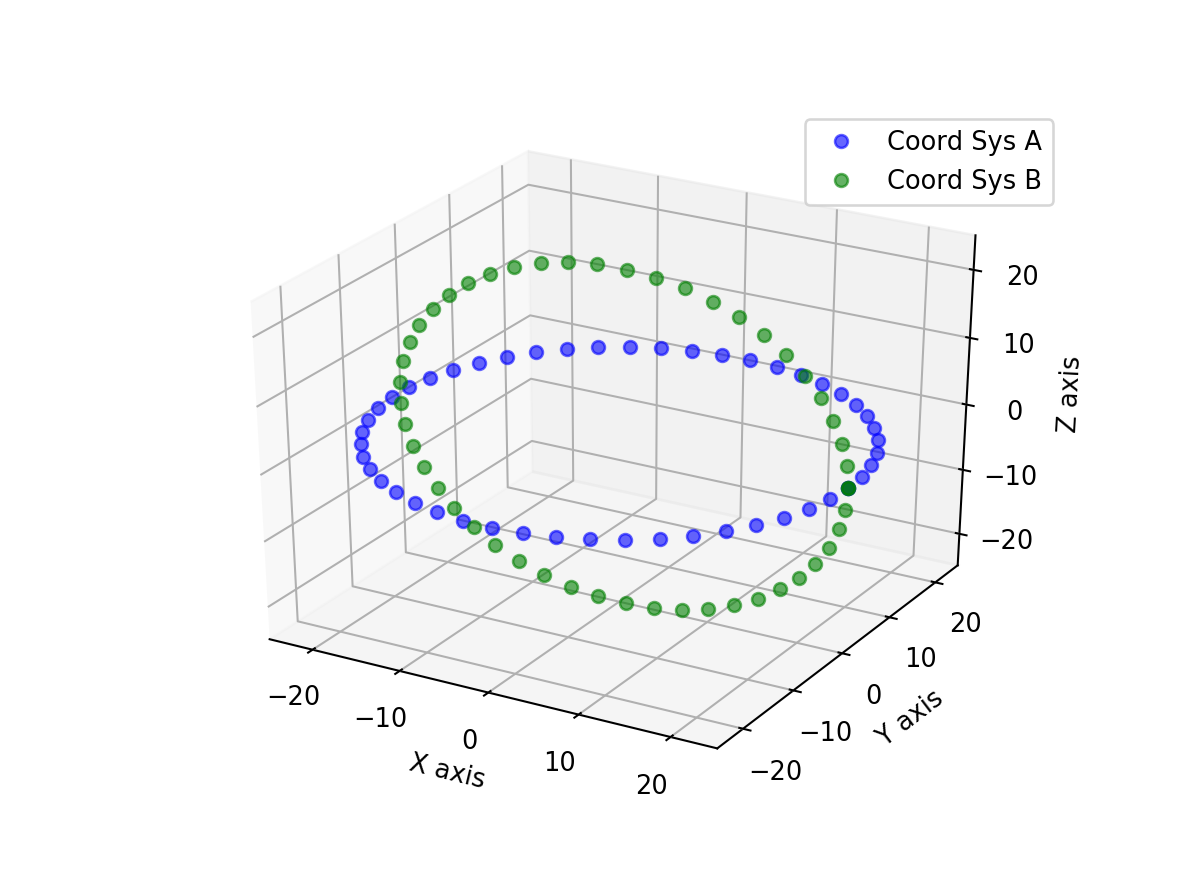

In [6]:
# Graph Points
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
box_lim = 24
ax.set_xlim(-box_lim, box_lim)
ax.set_ylim(-box_lim, box_lim)
ax.set_zlim(-box_lim, box_lim)

ax.plot(xs = data_pts_in_A.x.values, ys = data_pts_in_A.y.values, zs = data_pts_in_A.z.values,
        markerfacecolor='b', markeredgecolor='b', linestyle = 'none', marker='o', markersize=5, alpha=0.6, label = 'Coord Sys A')

ax.plot(xs = data_pts_in_B.x.values, ys = data_pts_in_B.y.values, zs = data_pts_in_B.z.values,
        markerfacecolor='g', markeredgecolor='g', linestyle = 'none', marker='o', markersize=5, alpha=0.6, label = 'Coord Sys B')
ax.legend()

<table style="width:30%">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>

https://en.wikipedia.org/wiki/Rotation_matrix#In_three_dimensions
https://stackoverflow.com/questions/40031287/matrix-operations-with-rows-of-pandas-dataframes